# An Analysis of 2022 Stackoverflow developer suvery using Panads, matplotlib and numpy by Miran Qarachatani

## Stack Overflow is a popular website amongst programmers worldwide. It's a question-and-answer platform where developers ask and answer each other's questions, often related to programming problems. Every year, Stack Overflow conducts a survey to gather data about the programming industry. The survey is open to anyone who has worked with a programming language or framework in the past year. In this project, I'm going to do a short analysis of the 2022 survey, and try to answer questions such as: What does the developer compensation look like across countries, what is the education level of developers, and whether developers use VCS and what VCS do they use

In [157]:
#importing the libraries we need
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.style as style

# Set the style of the plots to 'seaborn-darkgrid'
style.use('seaborn-darkgrid')

## The data is in the form of two csv files the survey results and the survey schema which contains the questions asked. Let's create a dataframes one for the survey and the other for the survey schema and set their indexes

In [158]:
#creating the data frames for the suvey results and the survey schema
df = pd.read_csv("data/survey_results_public.csv", index_col="ResponseId")
schema_df = pd.read_csv("data/survey_results_schema.csv",index_col="qname")

## We can see that there are 73268 respondents and there are 78 colums in our survey result dataset.


In [159]:
df.shape

(73268, 78)

## Let's see the the column names and thier respective data types in the survey response dataframe

In [160]:
#use the info method to check the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73268 entries, 1 to 73268
Data columns (total 78 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MainBranch                      73268 non-null  object 
 1   Employment                      71709 non-null  object 
 2   RemoteWork                      58958 non-null  object 
 3   CodingActivities                58899 non-null  object 
 4   EdLevel                         71571 non-null  object 
 5   LearnCode                       71580 non-null  object 
 6   LearnCodeOnline                 50685 non-null  object 
 7   LearnCodeCoursesCert            29389 non-null  object 
 8   YearsCode                       71331 non-null  object 
 9   YearsCodePro                    51833 non-null  object 
 10  DevType                         61302 non-null  object 
 11  OrgSize                         51039 non-null  object 
 12  PurchaseInfluence               

In [161]:
#change the default jupyternotebook options to view more data
pd.set_option("display.max_columns",79)
pd.set_option("display.max_rows",100)

## Let's see the content of the survey by printing the question column in our schema dataframe

In [162]:

for index, question in enumerate(schema_df['question']):
        print(question)
    

<div><span style="font-size:19px;"><strong>Hello world! </strong></span></div>

<div> </div>

<div>Thank you for taking the 2022 Stack Overflow Developer Survey, the longest running survey of software developers (and anyone else who codes!) on Earth. </div>

<div> </div>

<div>As in previous years, anonymized results of the survey will be made publicly available under the Open Database License, where anyone can download and analyze the data. On that note, throughout the survey, certain answers you and your peers give will be treated as personally identifiable information, and therefore kept out of the anonymized results file. We'll call out each of those in the survey with a note saying "This information will be kept private." </div>

<div> </div>

<div>There are seven sections in this survey. The 2nd, 3rd, and 4th sections will appear in a random order.</div><div><br></div>

<div>   1. Basic Information</div>

<div>   2. Education, Work, and Career</div>

<div>   3. Technology and Tec

## we can see the survey, but there are html elements which makes it difficult for us to read the survey. Let's write a function that removes eveything inside <> i.e the html tags

In [163]:
CLEANR = re.compile('<.*?>') 

def cleanhtml(raw_html):
  cleantext = re.sub(CLEANR, '', raw_html)
  return cleantext


## Now running the loop again but passing it through the cleanhtml function we can see the survey

In [164]:
for index, question in enumerate(schema_df['question']):
        cleaned_question = cleanhtml(question)
        print(f"{cleaned_question}")

Hello world! 

 

Thank you for taking the 2022 Stack Overflow Developer Survey, the longest running survey of software developers (and anyone else who codes!) on Earth. 

 

As in previous years, anonymized results of the survey will be made publicly available under the Open Database License, where anyone can download and analyze the data. On that note, throughout the survey, certain answers you and your peers give will be treated as personally identifiable information, and therefore kept out of the anonymized results file. We'll call out each of those in the survey with a note saying "This information will be kept private." 

 

There are seven sections in this survey. The 2nd, 3rd, and 4th sections will appear in a random order.

   1. Basic Information

   2. Education, Work, and Career

   3. Technology and Tech Culture

   4. Stack Overflow Usage + Community

   5. Demographic Information 

   6. Professional Developer Series (Optional)   7. Final Questions

 
Most questions in t

## Not all those columns are questions so let's create a subset dataframe of the schema dataframe that only contains the quesitons to see only the questions

In [165]:
#drop the columns that are not questions, the S are section headings and the meta and main branch are the welcome message
just_questions_df = schema_df.drop(['MetaInfo','MainBranch','S0','S1','S2','S3','S4','S5','S6','S7'])
#loop through the question column of the cleaned dataframe
for index, question in enumerate(just_questions_df['question']):
        cleaned_question = cleanhtml(question)
        print(f" {index+1}. {cleaned_question}")

 1. Which of the following best describes your current employment status?
 2. Which best describes your current work situation?
 3. Which of the following best describes the code you write outside of work? Select all that apply.
 4. Which of the following best describes the highest level of formal education that you’ve completed? *
 5. How did you learn to code? Select all that apply.
 6. What online resources do you use to learn to code? Select all that apply.
 7. What online courses or certifications do you use to learn to code? Select all that apply.
 8. Including any education, how many years have you been coding in total?
 9. NOT including education, how many years have you coded professionally (as a part of your work)?
 10. Which of the following describes your current job? Please select all that apply.
 11. Approximately how many people are employed by the company or organization you currently work for? 
 12. What level of influence do you, personally, have over new technology p

## Some questions are optional in this survey, so let's see the which questons are optional and which how many poeple answered them.

In [166]:
#get the optional questions
is_optional_questions = just_questions_df[just_questions_df['force_resp']==False]
#get the indicies of the optional questions
optional_questions_indices= is_optional_questions.index.values.tolist()
#get the all the quesion indicies for the dataframe
df_questions = df.columns.tolist()
#loop through the optional question indicies and if it is in the dataframe questions append it to the list
optional_questions = []
for i in range(len(optional_questions_indices)):
    if optional_questions_indices[i] in df_questions:
        optional_questions.append(optional_questions_indices[i])

(df[optional_questions].isna().sum()).sort_values(ascending=False)

LearnCodeCoursesCert    43879
ProfessionalTech        38362
Onboarding              37589
TimeAnswering           37246
TimeSearching           37070
ICorPM                  36985
WorkExp                 36499
CompTotal               34846
CompFreq                28843
LearnCodeOnline         22583
PurchaseInfluence       22299
OrgSize                 22229
YearsCodePro            21435
SOPartFreq              15039
CodingActivities        14369
RemoteWork              14310
DevType                 11966
MentalHealth             6821
Sexuality                6703
Accessibility            6024
BuyNewTool               5305
VCInteraction            5112
Ethnicity                3794
Trans                    2953
SurveyLength             2824
SurveyEase               2760
Gender                   2415
Age                      2322
SOVisitFreq              2307
Blockchain               2197
YearsCode                1937
NEWSOSites               1903
VersionControlSystem     1889
SOComm    

## Let's see the top 10 questions that developers didn't answer

In [167]:
top_7_unanswered_questions=[schema_df.loc['LearnCodeCoursesCert'],schema_df.loc['ProfessionalTech'],schema_df.loc['Onboarding'],schema_df.loc['TimeAnswering'],schema_df.loc['TimeSearching'],schema_df.loc['ICorPM'],schema_df.loc['WorkExp'],schema_df.loc["CompTotal"],schema_df.loc['CompFreq'],schema_df.loc['LearnCodeOnline']]
for no, element in enumerate(top_7_unanswered_questions):
    print(f"{no+1}. {element['question']}\n")

1. What online courses or certifications do you use to learn to code? Select all that apply.

2. My company has:

3. The time it takes to onboard new hires at my company is:

4. On an average day, how much time do you typically spend answering questions you get asked at work?

5. On an average day, how much time do you typically spend searching for answers or solutions to problems you encounter at work? (This includes time spent searching on your own, asking a colleague, and waiting for a response).

6. Are you an independent contributor or people manager?

7. How many years of working experience do you have?

8. What is your current total compensation (salary, bonuses, and perks, before taxes and deductions)? Please enter a whole number in the box below, without any punctuation.  If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.

9. Is that compensation weekly, monthly, or yearly?

10. What

## Let's see the percentage of people who didn't answer each optional question

In [168]:
#Since there are 73260 total respondents, divide the non answered questions by the total
#and multiply by 100 to get the percentage 
((df[optional_questions].isna().sum())/73260).sort_values(ascending=False) *100

LearnCodeCoursesCert    59.894895
ProfessionalTech        52.364182
Onboarding              51.309036
TimeAnswering           50.840841
TimeSearching           50.600601
ICorPM                  50.484575
WorkExp                 49.821185
CompTotal               47.564838
CompFreq                39.370734
LearnCodeOnline         30.825826
PurchaseInfluence       30.438165
OrgSize                 30.342615
YearsCodePro            29.258804
SOPartFreq              20.528256
CodingActivities        19.613705
RemoteWork              19.533170
DevType                 16.333606
MentalHealth             9.310674
Sexuality                9.149604
Accessibility            8.222768
BuyNewTool               7.241332
VCInteraction            6.977887
Ethnicity                5.178815
Trans                    4.030849
SurveyLength             3.854764
SurveyEase               3.767404
Gender                   3.296478
Age                      3.169533
SOVisitFreq              3.149058
Blockchain    

## Visualizing the results 

<AxesSubplot:>

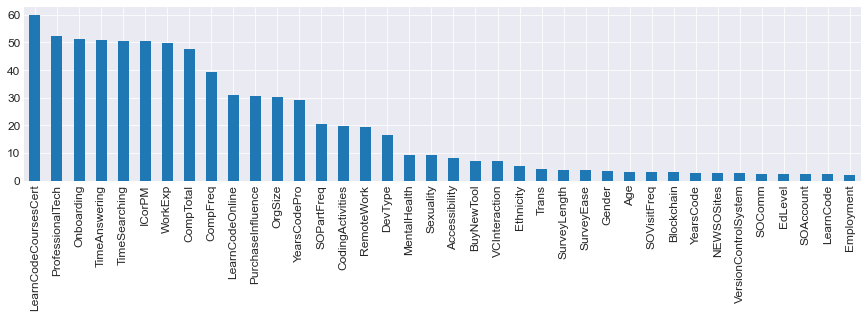

In [169]:
(((df[optional_questions].isna().sum().sort_values(ascending=False))/73260)*100).plot(kind='bar',figsize=(15,3.2),fontsize=12)

## This is very interesting, the first question shows that either stack overflow didn't include all the certifications or a lot of surveyers didn't have tech certifications or both. The other two questions are about the company, an explenation would be either the employees don't know or don't care or don't want to disclose information about the company they work at. At first I expected the questions about compensation be the most unanswered, however it turned out I was wrong

## Now let's see which countries the surveyer takers  are from

In [170]:
# Create a pandas group object based on countries
country_group = df.groupby(['Country'])

# Get the group names as a list
group_names = list(country_group.groups.keys())

print('The country names are:')
# Print the group names
print(group_names)

# Print the number of groups
print(f"\n There are {len(group_names)} countries in our survey")


The country names are:
['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Chad', 'Chile', 'China', 'Colombia', 'Congo, Republic of the...', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', "Côte d'Ivoire", 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong (S.A.R.)', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran, Islamic Republic of...', 'Iraq', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 

## Let's see the median yearly salary that is converted to USD in  the top 30 countries with highest salaries

In [171]:
country_group['ConvertedCompYearly'].median().nlargest(30)

Country
Monaco                                                  5000000.0
Haiti                                                   1560600.0
United States of America                                 145000.0
Israel                                                   128238.0
Barbados                                                 125001.0
Lao People's Democratic Republic                         120000.0
Switzerland                                              113761.0
Ireland                                                   95979.0
Australia                                                 93772.0
Canada                                                    93701.0
Iceland                                                   91920.0
Denmark                                                   89472.0
New Zealand                                               83633.0
Nomadic                                                   83316.5
Norway                                                    82964.0
Un

## We can see that Monaco and Haiti have the highest median salaries which is strange. Let's investigate further, and see how many people answered the suvery from the countries.

In [172]:
#get the indexes of the countries as a list
country_titles = country_group['ConvertedCompYearly'].median().nlargest(100).index.tolist()
#make an arra for all the groups
groups = [country_group.get_group(country) for country in country_titles]
#print the group lenght, i.e the number of poeple taken the survey
for group in groups:
    print(F"{group['Country'].iloc[0]} has {len(group)} survey takers")

Monaco has 1 survey takers
Haiti has 3 survey takers
United States of America has 13543 survey takers
Israel has 795 survey takers
Barbados has 6 survey takers
Lao People's Democratic Republic has 7 survey takers
Switzerland has 932 survey takers
Ireland has 332 survey takers
Australia has 1462 survey takers
Canada has 2490 survey takers
Iceland has 28 survey takers
Denmark has 547 survey takers
New Zealand has 440 survey takers
Nomadic has 37 survey takers
Norway has 479 survey takers
United Kingdom of Great Britain and Northern Ireland has 4190 survey takers
Andorra has 15 survey takers
Singapore has 226 survey takers
Luxembourg has 56 survey takers
Cape Verde has 4 survey takers
Kuwait has 20 survey takers
Germany has 5395 survey takers
Netherlands has 1555 survey takers
Finland has 468 survey takers
Japan has 333 survey takers
United Arab Emirates has 165 survey takers
Timor-Leste has 4 survey takers
Sweden has 1020 survey takers
Saudi Arabia has 116 survey takers
Austria has 833 s

## We can clearly see that some countries like Haiti and Monaco have very  few survey takers which will influence the median salaries signigicantly, hence it's better to filter the groups and only get the groups with more than 10 survey takers


In [173]:
#get the filtered groups 
filtered_groups = [group for group in groups if len(group) >= 10]

In [174]:
# now we can make a series which has the highest median salaries in countries where the number of survey takers are larger than 10
# Create a list of the median values
country_names = [group['Country'].iloc[0] for group in filtered_groups]

# Create a list of the median values
median_comps = [group['ConvertedCompYearly'].median() for group in filtered_groups]

# Create a series from the country names and median values
median_comps_series = pd.Series(median_comps, index=country_names)
print(median_comps_series)

United States of America                                145000.0
Israel                                                  128238.0
Switzerland                                             113761.0
Ireland                                                  95979.0
Australia                                                93772.0
Canada                                                   93701.0
Iceland                                                  91920.0
Denmark                                                  89472.0
New Zealand                                              83633.0
Nomadic                                                  83316.5
Norway                                                   82964.0
United Kingdom of Great Britain and Northern Ireland     82922.0
Andorra                                                  76784.0
Singapore                                                74196.0
Luxembourg                                               73317.5
Kuwait                   

# Let's visualize the results 


Text(0.5, 0.5, 'Analyzed by Miran Qarachatani')

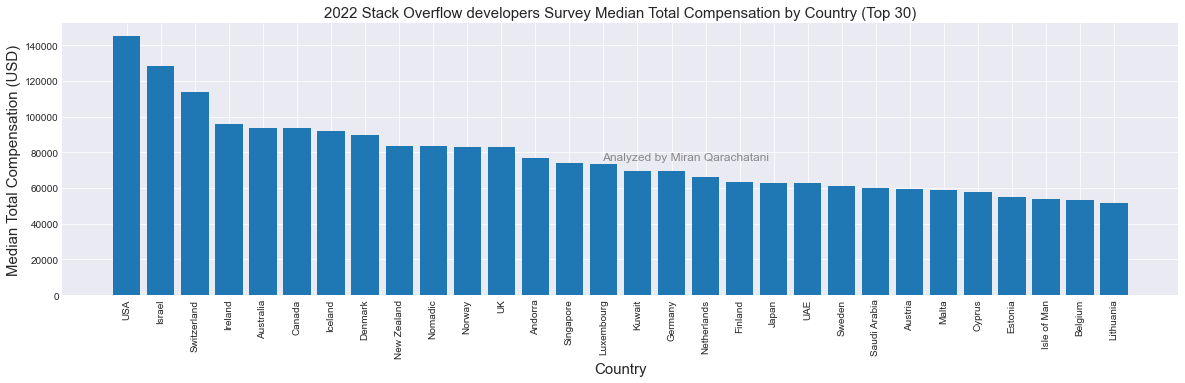

In [175]:
# Extract the index and values from the series
x = median_comps_series.nlargest(30).index
y = median_comps_series.nlargest(30).values

# Create a dictionary of abbreviations for the long country names
abbreviations = {
    'United Kingdom of Great Britain and Northern Ireland': 'UK',
    'United States of America': 'USA',
    'United Arab Emirates':'UAE'
}

# Abbreviate the long country names
x = [abbreviations.get(name, name) for name in x]

# Create a figure object and set the size
fig = plt.figure(figsize=(20, 5))

# Create the bar plot
plt.bar(x, y)

# Set the x-tick labels to the abbreviated names
plt.xticks(x,fontsize=10)

# Rotate the x-tick labels
plt.xticks(rotation=90)

# Add a title and axis labels
plt.title('2022 Stack Overflow developers Survey Median Total Compensation by Country (Top 30)', fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Median Total Compensation (USD)',fontsize=15)
plt.text(0.5, 0.5, 'Analyzed by Miran Qarachatani', fontsize=12, alpha=0.5, transform=plt.gcf().transFigure)


## We can see that after filtering for the countries which have larger than 10 survey takers. United States, Isreal, and Switzerland have  the highest paid developers worldwide.

## Now let's see which countries have the lowest total compensation for their developers

In [176]:
median_comps_series.nsmallest(10)

Maldives                     19068.0
Peru                         19296.0
Benin                        19512.0
Honduras                     20349.0
Palestine                    20700.0
Azerbaijan                   21180.0
Paraguay                     21948.0
Congo, Republic of the...    24000.0
Colombia                     24156.0
Trinidad and Tobago          24396.0
dtype: float64

## To see the median of top 10 countries with the lowest compensation:

In [177]:
median_comps_series.nsmallest(10).median()

20940.0

## And the median for the top 10 countries with the highest compensaion:

In [178]:
median_comps_series.nlargest(10).median()

93736.5

## We can see that the top 10 countries with highest compansation have a median compensation that is about 4 times higher than the lowest 10 countries. Considering the overall income inequality this doens't look very bad. However we must also consider that the poorest countries in the world might have very few developers, and might not be in the survey at all

## Let's visualize the income differences

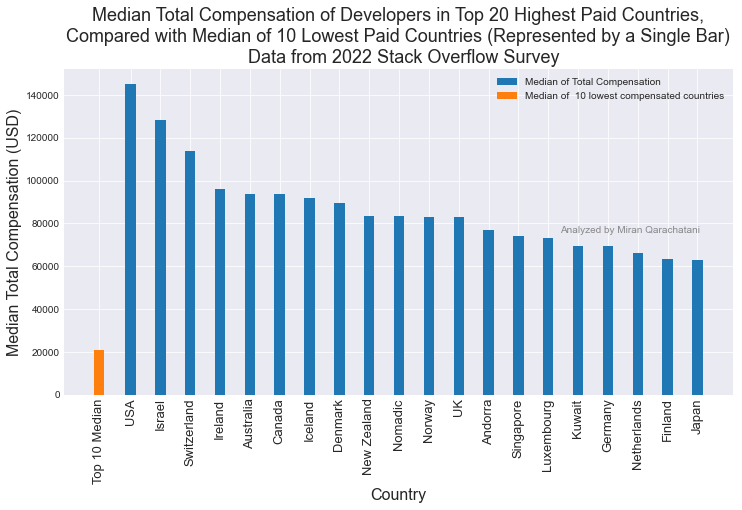

In [179]:
# Extract the top 20 countries by median total compensation
top_20 = median_comps_series.nlargest(20)

# Calculate the median of the top 10 lowest median countries
top_10_median = median_comps_series.nsmallest(10).median()

# Set the width of the bars
bar_width = 0.35

# Set the x-coordinates of the bars
x1 = np.arange(len(top_20))
x2 = -2 * bar_width

# Extract the values for the bars
y1 = top_20.values
y2 = top_10_median

# Create a dictionary to map full names of countries to abbreviations
country_abbrevs = {
    'United Kingdom of Great Britain and Northern Ireland': 'UK',
    'United States of America': 'USA',
    'United Arab Emirates': 'UAE',
}

# Abbreviate the country names using the dictionary
labels = top_20.index.map(lambda x: country_abbrevs.get(x, x))

# Create a figure object and set the size
fig = plt.figure(figsize=(12, 6))

# Create the bar plot
plt.bar(x1 + bar_width, y1, width=bar_width, label='Median of Total Compensation ')
plt.bar(x2, y2, width=bar_width, label='Median of  10 lowest compensated countries')

# Set the x-tick labels to the abbreviated country names
plt.xticks(x1 + bar_width / 2, labels,fontsize=13)

# Add tick marks and labels for the top 10 median bar
plt.xticks(np.append(x1 + bar_width, x2), np.append(labels, ['Top 10 Median']))

# Rotate the x-tick labels
plt.xticks(rotation=90)

# Add a legend and a title
plt.legend()
plt.title('Median Total Compensation of Developers in Top 20 Highest Paid Countries,\n Compared with Median of 10 Lowest Paid Countries (Represented by a Single Bar) \n  Data from 2022 Stack Overflow Survey', fontsize=18)
plt.xlabel('Country', fontsize=16)
plt.ylabel('Median Total Compensation (USD)', fontsize=16)
plt.text(0.7, 0.5, 'Analyzed by Miran Qarachatani', fontsize=10, alpha=0.5, transform=plt.gcf().transFigure)

# Show the plot
plt.show()


# A lot of devlopers use version control, let's see which version control systems they use

In [180]:
vcsValueCounts =df['VersionControlSystem'].value_counts()
vcsValueCounts

Git                                          62055
I don't use one                               3080
Git;SVN                                       2858
Git;Other (please specify):                   1356
SVN                                            590
Other (please specify):                        523
Git;Mercurial                                  498
Mercurial                                      134
Git;Mercurial;SVN                              104
Git;Other (please specify):;SVN                 83
Git;Other (please specify):;Mercurial           28
Other (please specify):;SVN                     26
Git;Other (please specify):;Mercurial;SVN       24
Mercurial;SVN                                   13
Other (please specify):;Mercurial                5
Other (please specify):;Mercurial;SVN            2
Name: VersionControlSystem, dtype: int64

## Since this is a selection question, I split the data and add each value according to the keyword contained in it, then visualize it:

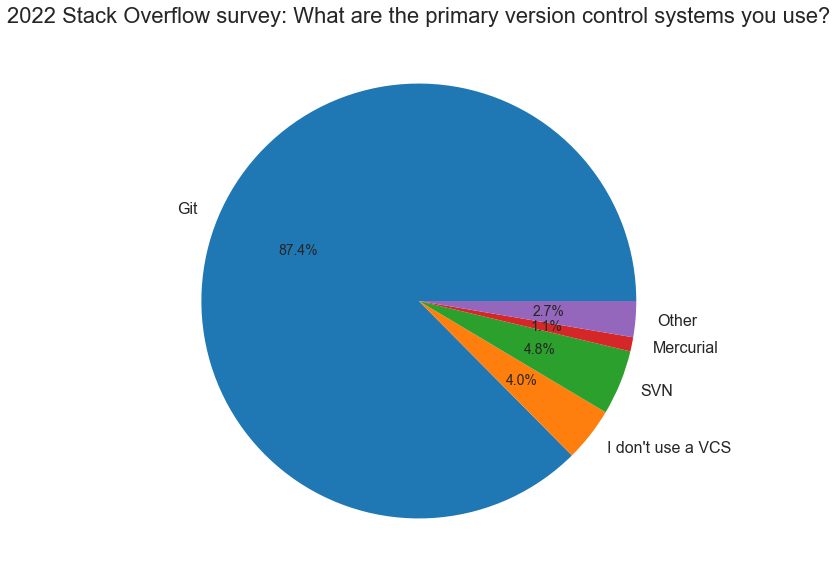

In [181]:
git = 0
notuse=0
svn = 0
mercurial=0
other=0

# Loop through the values and sum the values for each category
for i in range(len(vcsValueCounts)):
    index = vcsValueCounts.index[i]
    value = vcsValueCounts.iloc[i]
    if "Git" in index:
        git+=value
    if "I don't use one" in index:
        notuse+=vcsValueCounts.iloc[i]
    if "SVN" in index:
        svn+=vcsValueCounts.iloc[i]
    if "Mercurial" in index:
        mercurial+=vcsValueCounts.iloc[i]
    if "Other" in index:
        other+=vcsValueCounts.iloc[i]


# Calculate the total value
total = git+notuse+svn+mercurial+other

# Calculate the percentage values for each category
#list_of_values = [git, notuse, svn, mercurial,other]
#percentages = [value / total * 100 for value in list_of_values]

# Set the titles and percentages
titles = ['Git', "I don't use a VCS", 'SVN','Mercurial','Other']



# Create a figure object and set the size
fig = plt.figure(figsize=(12, 10))
# Create the pie chart
pie = plt.pie(list_of_values, labels=titles, autopct='%1.1f%%',textprops={'fontsize': 14})

# Increase the font size
for text in pie[1]:
    text.set_fontsize(16)

# Add a title
plt.title('2022 Stack Overflow survey: What are the primary version control systems you use?', fontsize=22)

# Show the plot
plt.show()


## This is very interesting, Most developers use git for version control

## Now let's see the education levels for the developers, since this question is manditory, our task is very easy

Text(0.5, 1.0, '2022 Stack Overflow developer survey: highest level of formal education completed')

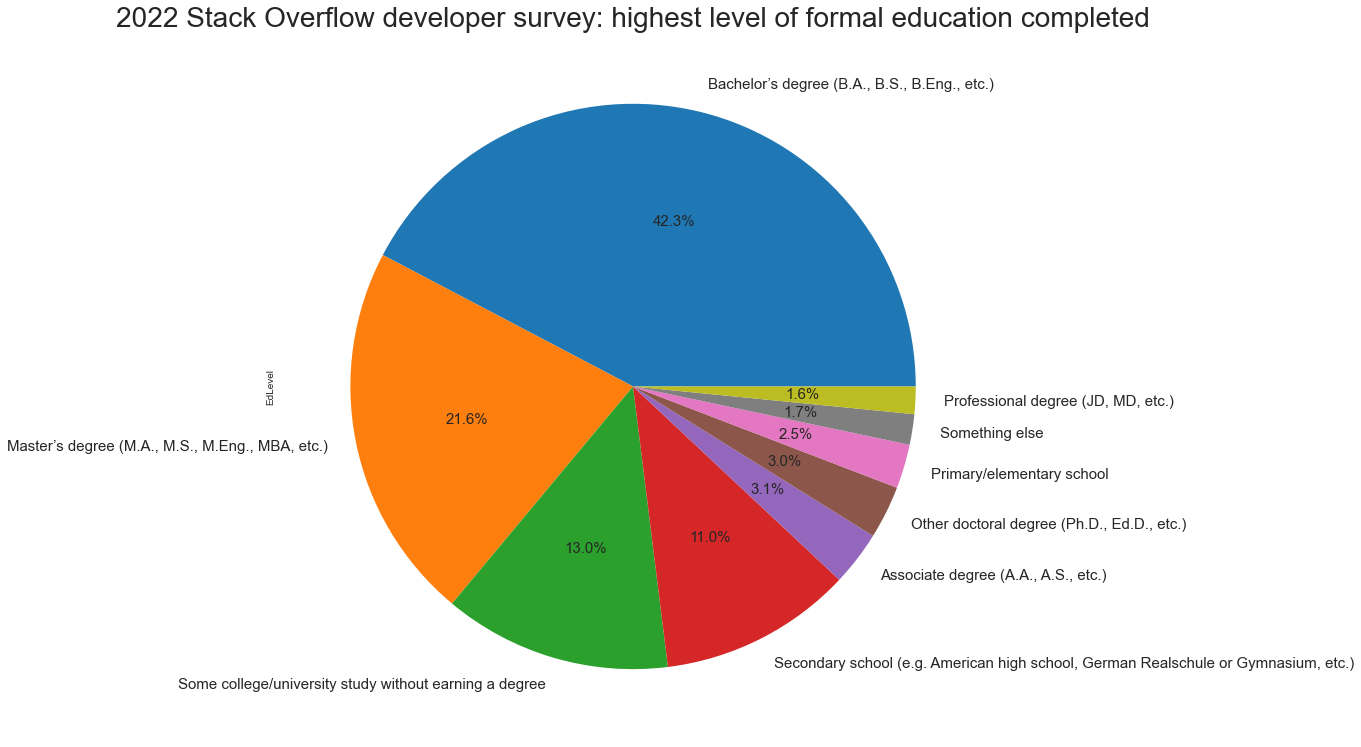

In [182]:
df['EdLevel'].value_counts().plot(kind='pie', figsize=(13,13), autopct='%1.1f%%', fontsize=15)
plt.title('2022 Stack Overflow developer survey: highest level of formal education completed', fontsize=28)

## Maybe viewing it as a horizantal bar chart gives us a better view

Text(0, 1.1, 'Education Levels of 2022 StackOverflow developer survey ')

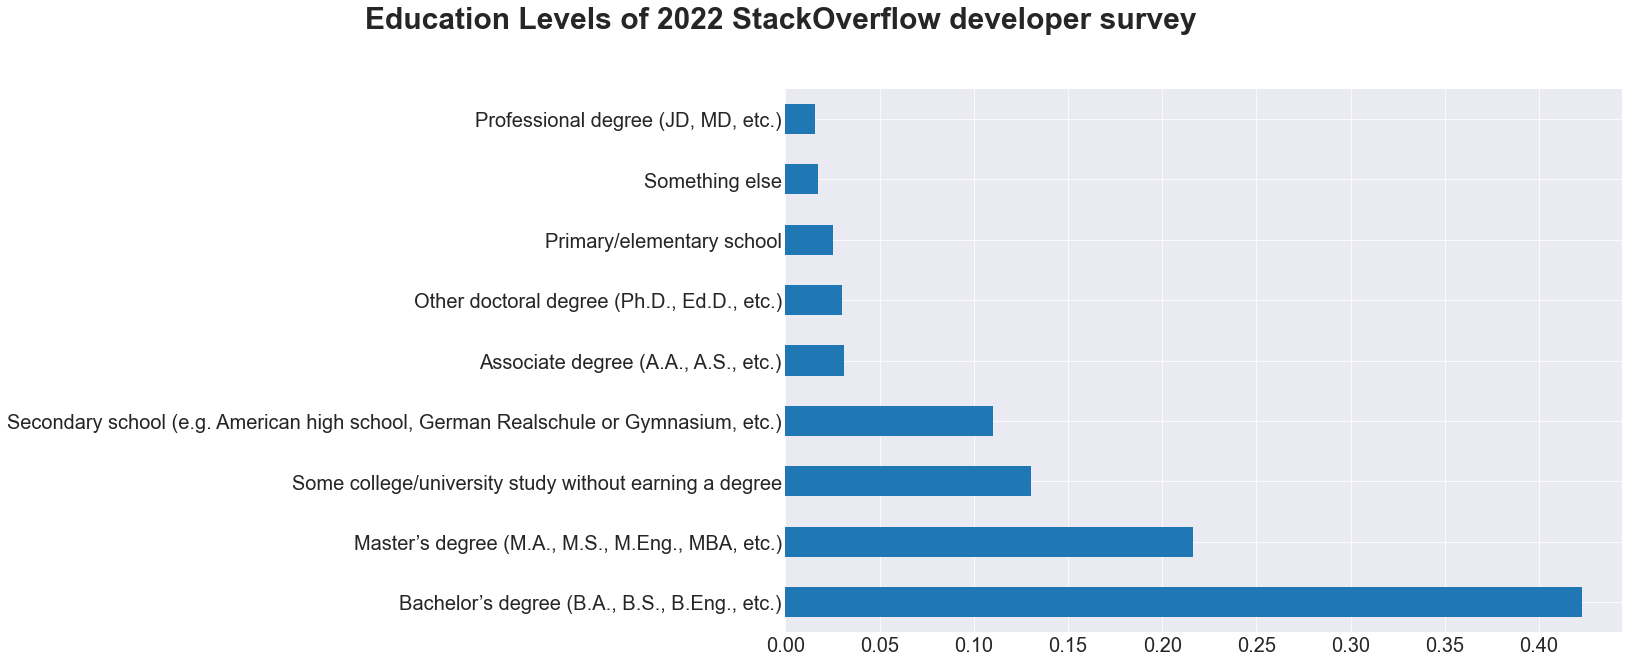

In [183]:
edplot =df["EdLevel"].value_counts(normalize=True).plot(kind='barh',figsize=(15,10),fontsize=20)
edplot.set_title('Education Levels of 2022 StackOverflow developer survey ', fontsize=30, fontweight='bold', x=0, y=1.1)

## Lot's of people say tech is male dominated let's see the data

<AxesSubplot:>

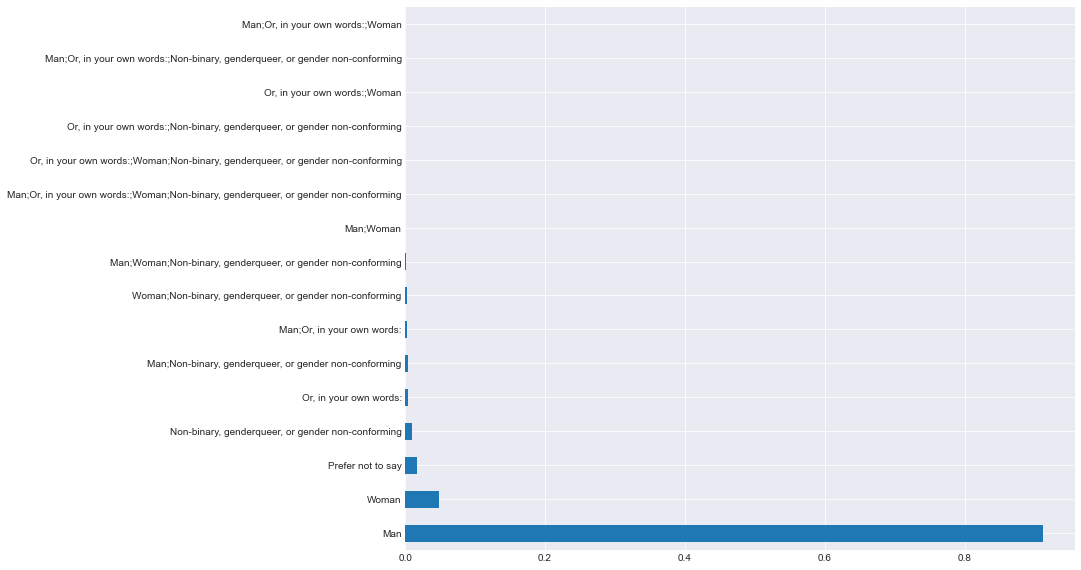

In [184]:
df['Gender'].value_counts(normalize=True).plot(kind='barh', figsize=(12,10))

## Indeed we can see that a vast majority of developers identify as Men

# This concludes the short analysis I made for the 2022 stack overflow developers survey! Hope you find it insigtful. And please reach out if you have suggestions 
## My LinkedIn account: https://www.linkedin.com/in/miran-qarachatani-14a173185/
